<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as smt

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.graphics.gofplots import qqplot

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import ElasticNet,ElasticNetCV

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from warnings import filterwarnings
filterwarnings('ignore')

<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [3]:
#Reading the dataset
df = pd.read_csv("Likes.csv")

#Displaying top 5 observations
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [4]:
#Displaying the information of the dataset:
df.info()

#we can understand 
#1. there are 2104 records 
#2. gender column has 2 null entries that needs to be removed
#3. Gender column has to be encoded
#4. dob_month, dob_day, friend_count, friendships_initiated can be converted to object type and label encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
userid                   2104 non-null int64
age                      2104 non-null int64
dob_day                  2104 non-null int64
dob_year                 2104 non-null int64
dob_month                2104 non-null int64
gender                   2102 non-null object
tenure                   2104 non-null int64
friend_count             2104 non-null int64
friendships_initiated    2104 non-null int64
likes                    2104 non-null int64
likes_received           2104 non-null int64
mobile_likes             2104 non-null int64
mobile_likes_received    2104 non-null int64
www_likes                2104 non-null int64
www_likes_received       2104 non-null int64
dtypes: int64(14), object(1)
memory usage: 246.7+ KB


In [5]:
# Missing value treatment:
print(df.isnull().sum())
df.dropna(subset=['gender'],inplace = True)

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   2
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64


In [6]:
#after treatment
print(df.isnull().sum())
print("\nDataset shape:",df.shape)

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

Dataset shape: (2102, 15)


In [7]:
#Mapping to appropriate data types:
df['dob_day'] = df['dob_day'].astype(object)
df['dob_month'] = df['dob_month'].astype(object)
df['friend_count'] = df['friend_count'].astype(object)
df['friendships_initiated'] = df['friendships_initiated'].astype(object)

In [8]:
#splitting into numeric and categoric variables:
df_numeric = df.select_dtypes(include = np.number).reset_index(drop=True)
df_numeric.columns

Index(['userid', 'age', 'dob_year', 'tenure', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [9]:
df_cat = df.select_dtypes(include = np.object).reset_index(drop=True)
df_cat.columns

Index(['dob_day', 'dob_month', 'gender', 'friend_count',
       'friendships_initiated'],
      dtype='object')

<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

In [10]:
#Displaying the number of unique values in each attribute
df.nunique()

#We can see Userid column has 2102 all unique values and hence can be dropped for further analysis

userid                   2102
age                        83
dob_day                    31
dob_year                   83
dob_month                  12
gender                      2
tenure                    715
friend_count                6
friendships_initiated       6
likes                     178
likes_received            100
mobile_likes              135
mobile_likes_received      66
www_likes                 124
www_likes_received         69
dtype: int64

In [11]:
#Dropping column User id
df.drop('userid',axis=1,inplace = True)

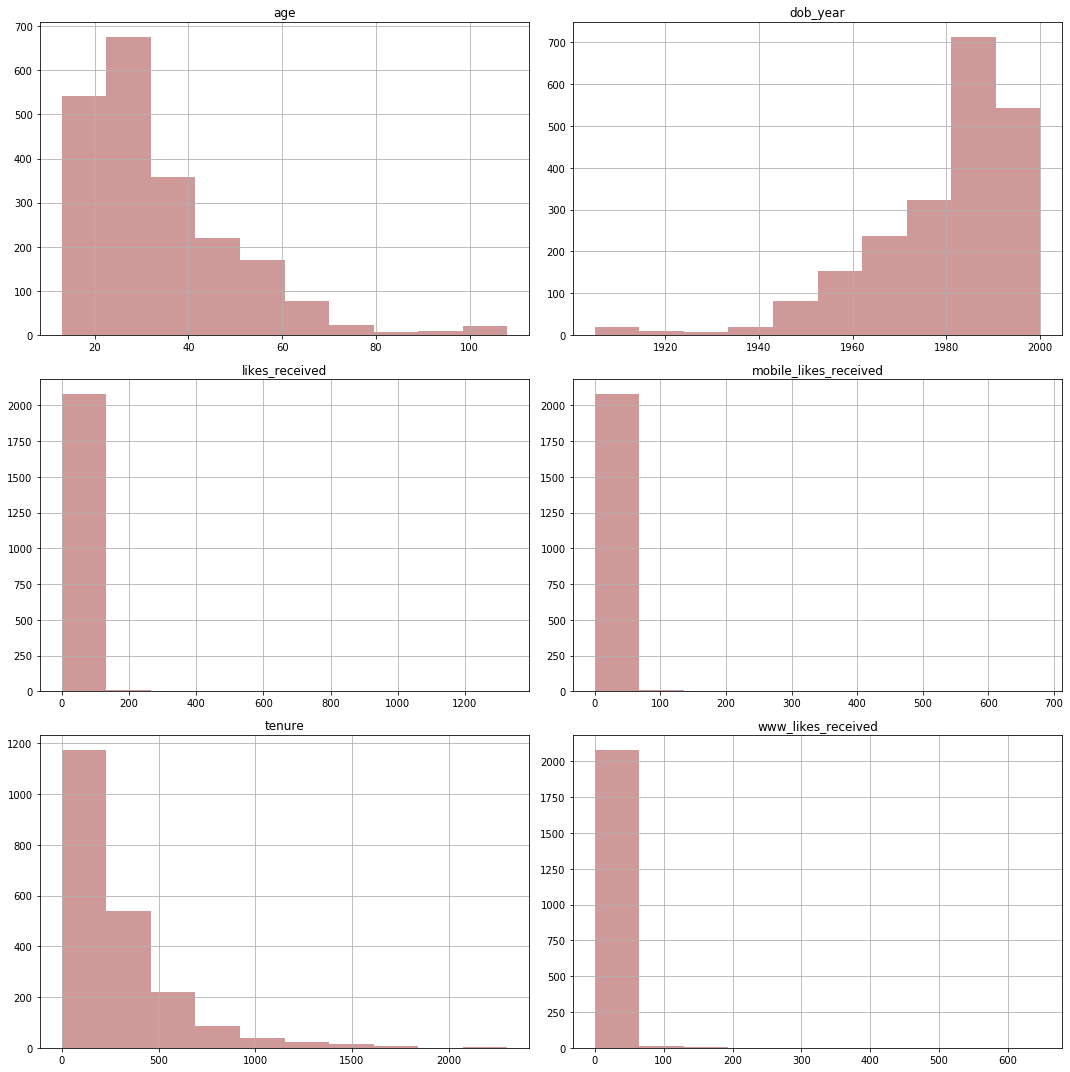

In [12]:
#Univariate analysis:
plt.rcParams['figure.figsize'] = [15,15]
df_numeric[['age','tenure','dob_year','likes_received','www_likes_received','mobile_likes_received']].hist(color = 'darkred',alpha = 0.4)
plt.tight_layout()
plt.show()

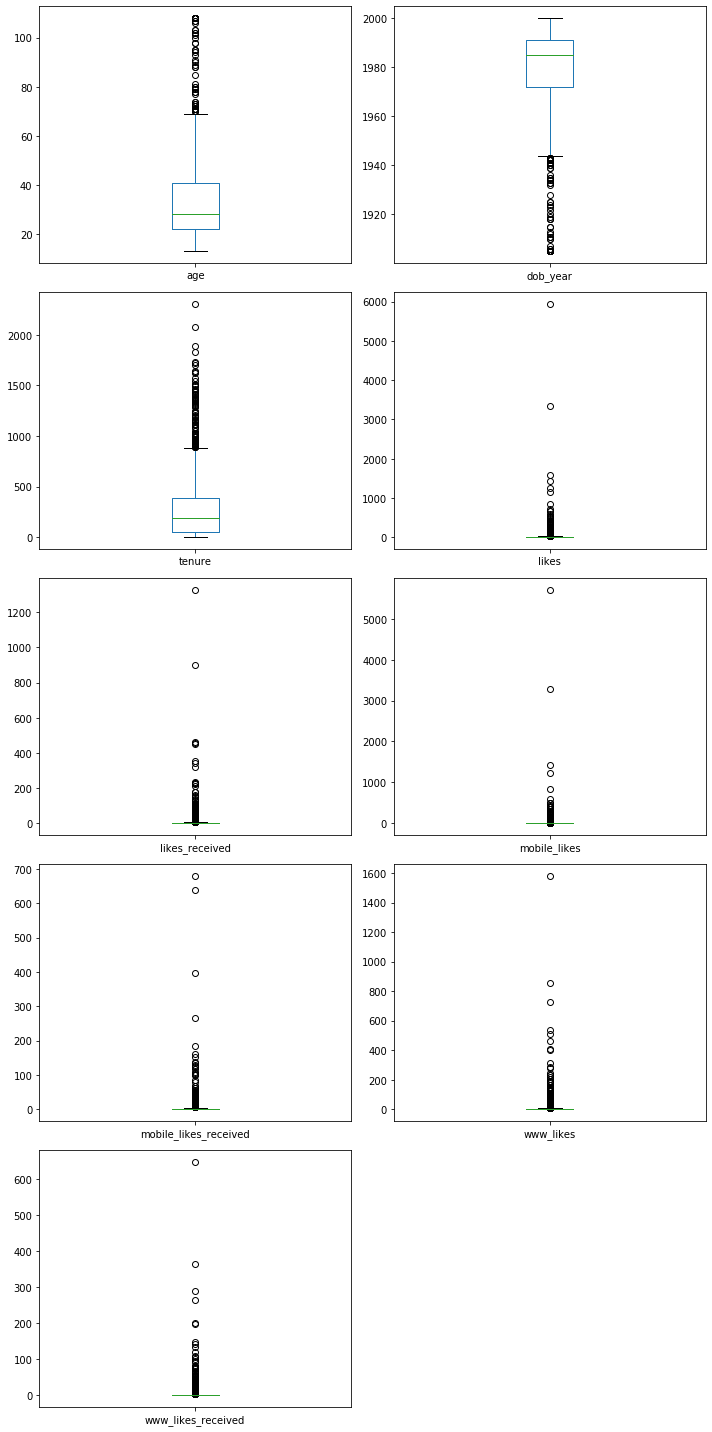

age                       1.630726
dob_year                 -1.630726
tenure                    2.038302
likes                    24.947661
likes_received           18.409403
mobile_likes             28.551561
mobile_likes_received    18.557995
www_likes                16.933760
www_likes_received       17.051536
dtype: float64


In [13]:
df_numeric.drop('userid',axis=1).plot(kind = 'box',subplots=True,layout=(5,2),figsize = (10,20))
plt.tight_layout()
plt.show()
print(df_numeric.drop('userid',axis=1).skew())

In [ ]:
#From the above graphs, we can understand that there are outliers present evidently.
#the data is also skewed:
    #dob_year is negatively skewed while other variables are positively skewed. 
    #The variable - mobile_likes has the highest skewness followed by variable Likes.

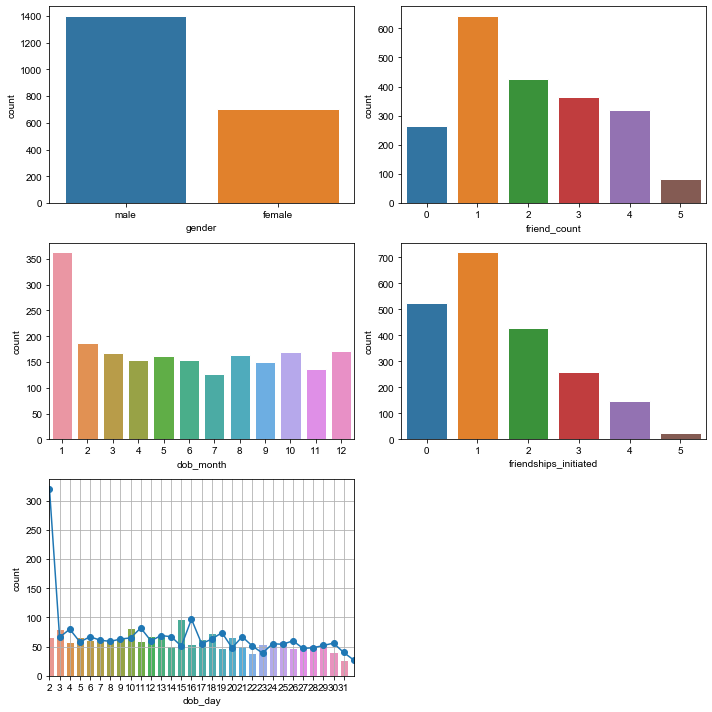

In [14]:
#For categoric variables
fig,ax=plt.subplots(3,2,figsize=(10,10))
sns.set_style(style='whitegrid')
sns.countplot(x='gender',data=df_cat,ax=ax[0][0])
sns.countplot(x='friend_count',data=df_cat,ax=ax[0][1])
sns.countplot(x='dob_month',data=df_cat,ax=ax[1][0])
sns.countplot(x='friendships_initiated',data=df_cat,ax=ax[1][1])
sns.countplot(x='dob_day',data=df_cat,ax=ax[2][0])
df_cat.groupby('dob_day')['dob_day'].count().plot(ax=ax[2][0],marker = 'o')
ax[2,1].set_axis_off()
plt.tight_layout()
plt.show()

#We can see that the data has higher percentage of male count than the female

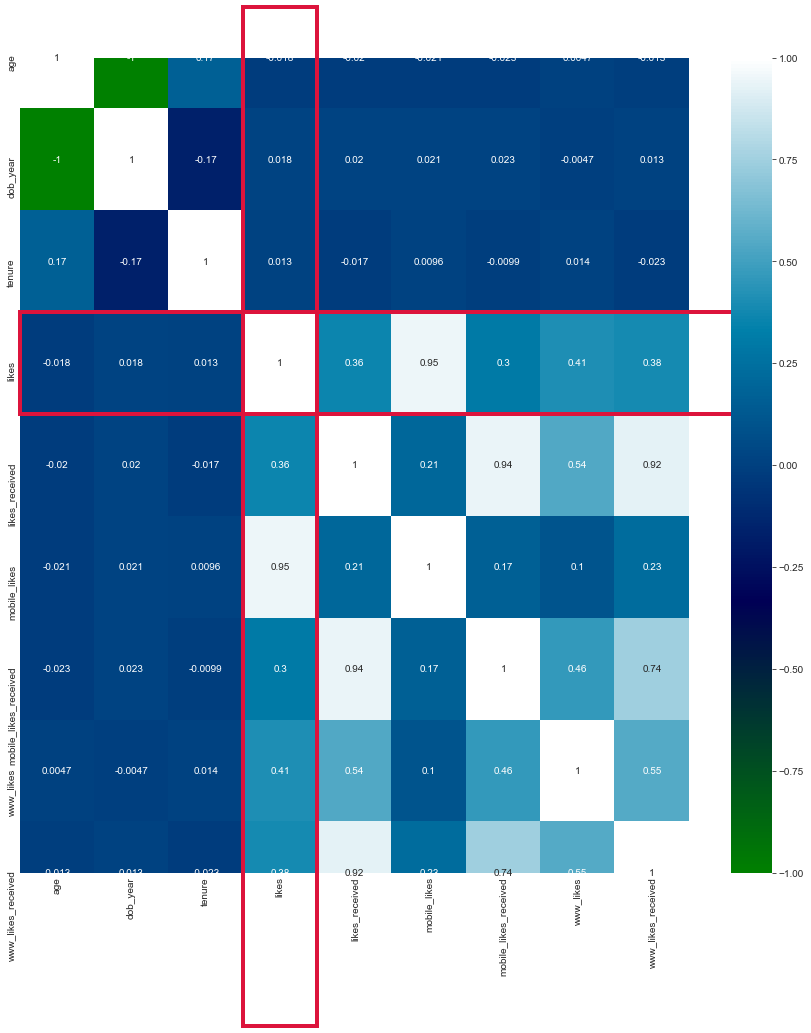

In [15]:
#Multivariate Analysis: Identifying correlation among the variables and also with respect to target variable

from matplotlib.patches import Rectangle
labels = list(df_numeric.columns)
N = len(labels)
s = sns.heatmap(df.corr(),annot=True,cmap = 'ocean')
wanted_label = 'likes'
wanted_index = 3
x, y, w, h = 0, wanted_index, N, 1
for _ in range(2):
    s.add_patch(Rectangle((x, y), w, h, fill=False, edgecolor='crimson', lw=4, clip_on=False))
    x, y = y, x # exchange the roles of x and y
    w, h = h, w # exchange the roles of w and h
s.tick_params(length=0)
plt.show()

In [ ]:
#With respect to the target variable - Likes:
    #1. mobile_likes is highly correlated
    #2. mobile_likes_received, likes_received, www_likes, www_likes_received are very moderately related
    #3. Age and hence dob_year are very weakly related. Age having the least negative relation
#Among the independent variables:
    #1. Below pairs are highly related:
        #Likes_received & www_likes_received
        #Likes_received & mobile_likes_received
        #www_likes_received & mobile_likes_received
        #dob_year and age are highly negatively related - exact opposite relation
    #2. Below pairs are having moderate relation:
        #www_likes & likes_received
        #www_likes & www_likes_received
        #mobile_likes_received & www_likes

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

In [16]:
df_numeric.drop(['userid'],axis=1,inplace = True)

In [17]:
#splitting the data into target and predictors:

data = pd.concat([df_numeric.drop(['likes'],axis=1),df_cat],axis=1)
target = df_numeric['likes']

In [18]:
#converting categoric variables into numeric by appropriate encoding methods:
data['dob_day'] = LabelEncoder().fit_transform(data['dob_day'])
data['dob_month'] = LabelEncoder().fit_transform(data['dob_month'])
data['friend_count'] = LabelEncoder().fit_transform(data['friend_count'])    
data['friendships_initiated'] = LabelEncoder().fit_transform(data['friendships_initiated'])
data['gender'] = pd.get_dummies(data['gender'],drop_first = True)
data.head()

,age,dob_year,tenure,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,dob_day,dob_month,gender,friend_count,friendships_initiated
0,13,2000,0,0,0,0,1,0,1,1,1,0,0
1,14,1999,104,0,0,0,1,0,21,0,1,0,0
2,19,1994,212,0,0,0,1,0,17,9,0,0,0
3,21,1992,328,0,0,0,1,0,0,0,1,0,0
4,23,1990,580,0,0,0,1,0,9,1,1,0,0


In [19]:
#Splitting the data as Train and Test sets in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(data,target,test_size = 0.3,random_state = 42)
print("X-train",X_train.shape)
print("X-test",X_test.shape)
print("Y-train",Y_train.shape)
print("Y-test",Y_test.shape)

X-train (1471, 13)
X-test (631, 13)
Y-train (1471,)
Y-test (631,)


In order **to ensure data leakage does not occur, splitting of data is done followed by Scaling** the features separately for train set and test sets

In [20]:
#Scaling the numeric features using Min Max scaler as the variables are not following normal distribution:
X_train[['age','dob_year','tenure','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']] = MinMaxScaler().fit_transform(X_train[['age','dob_year','tenure','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']])
X_test[['age','dob_year','tenure','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']]= MinMaxScaler().fit_transform(X_test[['age','dob_year','tenure','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']])

Y_train = (Y_train-Y_train.min())/(Y_train.max()-Y_train.min())
Y_test = (Y_test-Y_test.min())/(Y_test.max()-Y_test.min())

<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



In [21]:
#Building a full model using OLS method

full_model = sm.OLS(Y_train,sm.add_constant(X_train)).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.307e+31
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:43:34   Log-Likelihood:                 52756.
No. Observations:                1471   AIC:                        -1.055e+05
Df Residuals:                    1459   BIC:                        -1.054e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0001      4e-18  -2.81e+13      0.000      -0.000      -0.000
age                   -5.615e-05   6.21e-18  -9.05e+12      0.000   -5.62e-05   -5.62e-05
dob_year              -5.615e-05   4.14e-18  -1.36e+13      0.000   -5.62e-05   -5.62e-05
tenure                -2.125e-17   1.22e-17     -1.741      0.082   -4.52e-17     2.7e-18
likes_received        -3.331e-16   2.13e-17    -15.651      0.000   -3.75e-16   -2.91e-16
mobile_likes              0.9609   5.62e-17   1.71e+16      0.000       0.961       0.961
mobile_likes_received  7.494e-16   4.33e-17     17.323      0.000    6.65e-16    8.34e-16
www_likes                 0.1220   3.18e-17   3.84e+15      0.000       0.122       0.122
www_likes_received     1.388e-16   4.32e-17      3.215      0.001    5.41e-17    2.23e-16
dob_day               -1.725e-18   1.91e-19     -9.050      0.000    -2.1e-18   -1.35e-18
dob_month              8.741e-19   4.81e-19      1.816      0.070   -6.99e-20    1.82e-18
gender                  3.86e-17    3.6e-18     10.735      0.000    3.15e-17    4.57e-17
friend_count           2.472e-17   1.99e-18     12.437      0.000    2.08e-17    2.86e-17
friendships_initiated   -2.7e-17   2.25e-18    -11.995      0.000   -3.14e-17   -2.26e-17
==============================================================================
Omnibus:                     2470.090   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3723169.950
Skew:                          10.567   Prob(JB):                         0.00
Kurtosis:                     248.558   Cond. No.                     2.40e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.68e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
Y_pred = full_model.predict(sm.add_constant(X_test))
Y_train_pred = full_model.predict(sm.add_constant(X_train))

In [23]:
print("R-squared value of full model:",full_model.rsquared)
print("Adjusted R-squared value of full model:",full_model.rsquared_adj)
mse_train = mean_squared_error(Y_train,Y_train_pred)
mse_test = mean_squared_error(Y_test,Y_pred)
print("Root Mean square error of train set:",round(np.sqrt(mse_train),4))
print("Root Mean square error of test set:",round(np.sqrt(mse_test),4))

R-squared value of full model: 1.0
Adjusted R-squared value of full model: 1.0
Root Mean square error of train set: 0.0
Root Mean square error of test set: 0.0427


The R-squared of the full model is obtained as 1 and the RMSE of train set is 0 which implies **it is an overfitting model**. As per the p-values, dob_month & tenure seem like insigificant variables

In [36]:
#Using grid search cv to identify the number of features to be selected between 4 and 13:
n_feature = [{'n_features_to_select':list(range(4,14))}]
grid_model = GridSearchCV(estimator = RFE(LinearRegression()),param_grid= n_feature,scoring='r2')
grid_model.fit(X_train,Y_train)

print("Optimal number of features:",grid_model.best_params_)

Optimal number of features: {'n_features_to_select': 4}


In [25]:
#Using RFE to find 4 optimal features

rfe_model = RFE(estimator = LinearRegression(), n_features_to_select=4)
rfe_model = rfe_model.fit(X_train,Y_train)
#Displaying the features and their ranks

features = pd.Series(data = rfe_model.ranking_,index = X_train.columns)
signi_feat = features[features==1].index
print("Features to be selected:",list(signi_feat))

Features to be selected: ['age', 'dob_year', 'mobile_likes', 'www_likes']


In [26]:
#Building model using the 4 features selected using RFE
X_train_1 = X_train[['age', 'dob_year', 'mobile_likes', 'www_likes']]
X_test_1 = X_test[['age', 'dob_year', 'mobile_likes', 'www_likes']]

model = sm.OLS(Y_train,sm.add_constant(X_train_1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.495e+32
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:44:02   Log-Likelihood:                 53863.
No. Observations:                1471   AIC:                        -1.077e+05
Df Residuals:                    1467   BIC:                        -1.077e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0001   1.01e-18  -1.11e+14      0.000      -0.000      -0.000
age          -5.615e-05    2.7e-18  -2.08e+13      0.000   -5.62e-05   -5.62e-05
dob_year     -5.615e-05   1.85e-18  -3.04e+13      0.000   -5.62e-05   -5.62e-05
mobile_likes     0.9609   2.53e-17    3.8e+16      0.000       0.961       0.961
www_likes        0.1220   1.43e-17    8.5e+15      0.000       0.122       0.122
==============================================================================
Omnibus:                     2376.829   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1128076.404
Skew:                          10.293   Prob(JB):                         0.00
Kurtosis:                     137.094   Cond. No.                     2.21e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.03e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
#Evaluation of new model built using 4 features:

Y_train_pred_1 = model.predict(sm.add_constant(X_train_1))
Y_pred_1 = model.predict(sm.add_constant(X_test_1))

print("R-squared value of new model:",model.rsquared)
print("Adjusted R-squared value of new model:",model.rsquared_adj)
mse_train_1 = mean_squared_error(Y_train,Y_train_pred_1)
mse_test_1 = mean_squared_error(Y_test,Y_pred_1)
print("Root Mean square error of train set:",round(np.sqrt(mse_train_1),4))
print("Root Mean square error of test set:",round(np.sqrt(mse_test_1),4))

R-squared value of new model: 1.0
Adjusted R-squared value of new model: 1.0
Root Mean square error of train set: 0.0
Root Mean square error of test set: 0.0427


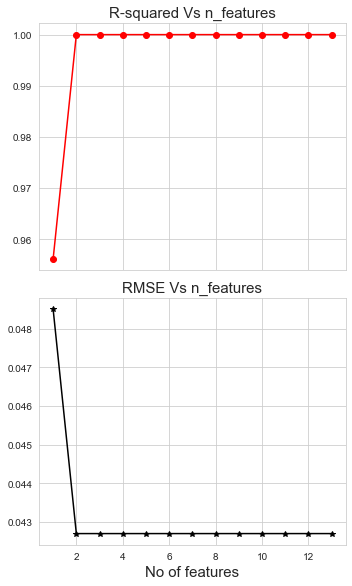

In [28]:
#plotting R2 and RMSE against no of features
r,rmse_train,rmse_test=[],[],[]
for i in range(1,len(X_train.columns)+1):
    rfe_model = RFE(estimator = LinearRegression(), n_features_to_select=i)
    rfe_model = rfe_model.fit(X_train,Y_train)
    features = pd.Series(data = rfe_model.ranking_,index = X_train.columns)
    signi_feat = list(features[features==1].index)
    X_train_ = X_train[signi_feat]
    X_test_ = X_test[signi_feat]
    model_ = sm.OLS(Y_train,sm.add_constant(X_train_)).fit()
    
    Y_train_pred_ = model_.predict(sm.add_constant(X_train_))
    Y_pred_ = model_.predict(sm.add_constant(X_test_))
    r.append(model_.rsquared)
    mse_train_ = mean_squared_error(Y_train,Y_train_pred_)
    mse_test_ = mean_squared_error(Y_test,Y_pred_)
    rmse_train.append(round(np.sqrt(mse_train_),4))
    rmse_test.append(round(np.sqrt(mse_test_),4))
fig,ax = plt.subplots(2,1,figsize=(5,8),sharex=True)
a = ax[0].plot(list(range(1,14)),r,marker = 'o',color='red')
ax[0].set_title("R-squared Vs n_features",fontsize=15)

b = ax[1].plot(list(range(1,14)),rmse_test,marker = '*',color='black')
ax[1].set_title("RMSE Vs n_features",fontsize=15)
plt.tight_layout()
plt.xlabel("No of features",fontsize=15)
plt.show()

Final inference:\
There is not any difference in R2 or RMSE values of full model and model built using 4 features selected by RFE. However it could be seen that the F-statistic has significantly improved in the new model considered. the r2 and RMSE values are reaching the constant level after feature count =2

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

#### Checking the Linearity of relationship between Dependent and Independent Variables for the full model:



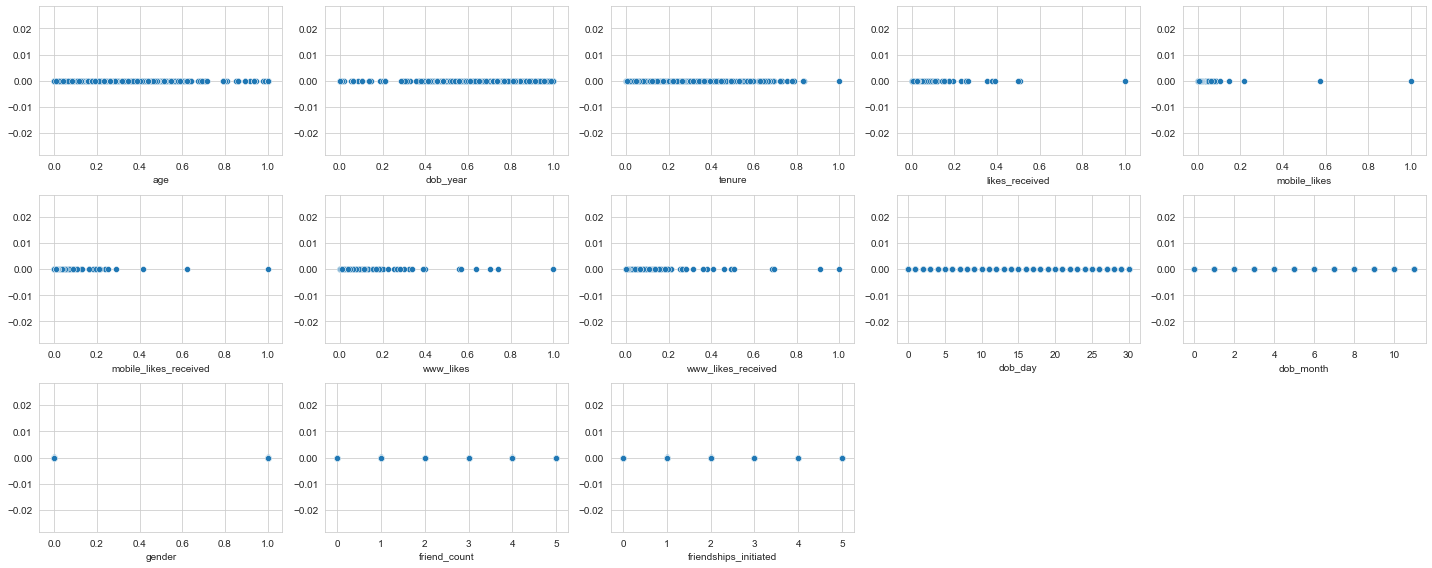

In [29]:
fig, ax = plt.subplots(3,5, figsize=(20,8))
for variable, subplot in zip(X_train.columns, ax.flatten()):
    sns.scatterplot(X_train[variable], full_model.resid , ax=subplot)
ax[2,3].set_axis_off()
ax[2,4].set_axis_off()
plt.tight_layout()
plt.show()

#the below graphs indicate that there is no specific patter displayed implying there is linearity present in the data

#### Checking the Homoscedasticity assumption - Equality of variance: GoldfeldQuandt test


In [30]:
#H0 : The error terms are homoscedastic
#H1: the error terms areheteroscedastic

import statsmodels.stats.api as g
g.het_goldfeldquandt(full_model.resid,X_train)

#P-value > 0.05 implying the we fail to reject null hypothesis and can conclude the error terms are homoscedastic

(0.3120304283625636, 0.9999999999999999, 'increasing')

#### Checking for normality of residuals: QQ plot & Shapiro Wilk's test

In [31]:
#shapiro -wilk test:

#H0: the residuals are normally distributed
#H1: the residuals are not normally distributed

stats.shapiro(full_model.resid)

ShapiroResult(statistic=0.54039466381073, pvalue=0.0)

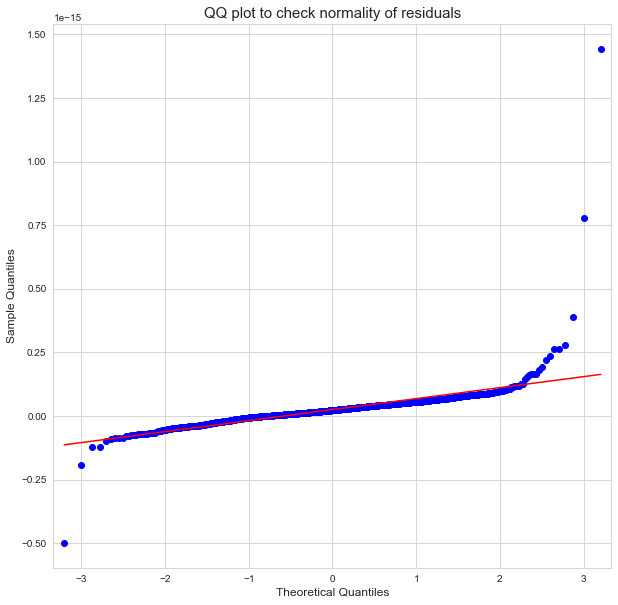

In [32]:
#QQ plot

plt.rcParams['figure.figsize']=[10,10]
qqplot(full_model.resid,line = 'r')
plt.title("QQ plot to check normality of residuals",fontsize=15)
plt.xlabel('Theoretical Quantiles', fontsize = 12)
plt.ylabel('Sample Quantiles', fontsize = 12)
plt.show()

#clearly the p value of shapiro wilk's test and the below QQ plot indicates that the residuals are not normally distributed

#### Checking for the assumption - No autocorrelation between residuals: Durbin Watson test

In [33]:
#Durbin Watson test:

#H0: Error terms are not Autocorrelated
#H1: Error terms are autocorrelated

from statsmodels.stats.stattools import durbin_watson
durbin_watson(full_model.resid)

1.7062188599102572

In [ ]:
#the test statistic is in the range of 1.5 to 2.5 and can conclude that there is no autocorrelation in the error terms

<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

In [37]:
#Using grid search cv to identify the number of features to be selected:
n_feature = [{'n_features_to_select':list(range(1,14))}]
grid_model = GridSearchCV(estimator = RFE(LinearRegression()),param_grid= n_feature,scoring='r2')
grid_model.fit(X_train,Y_train)

print("Optimal number of features:",grid_model.best_params_)

Optimal number of features: {'n_features_to_select': 2}


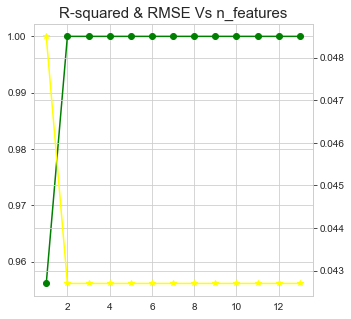

In [38]:
#plotting R2 and RMSE against no of features
r,rmse_train,rmse_test=[],[],[]
for i in range(1,len(X_train.columns)+1):
    rfe_model = RFE(estimator = LinearRegression(), n_features_to_select=i)
    rfe_model = rfe_model.fit(X_train,Y_train)
    features = pd.Series(data = rfe_model.ranking_,index = X_train.columns)
    signi_feat = list(features[features==1].index)
    X_train_ = X_train[signi_feat]
    X_test_ = X_test[signi_feat]
    model_ = sm.OLS(Y_train,sm.add_constant(X_train_)).fit()
    
    Y_train_pred_ = model_.predict(sm.add_constant(X_train_))
    Y_pred_ = model_.predict(sm.add_constant(X_test_))
    r.append(model_.rsquared)
    mse_train_ = mean_squared_error(Y_train,Y_train_pred_)
    mse_test_ = mean_squared_error(Y_test,Y_pred_)
    rmse_train.append(round(np.sqrt(mse_train_),4))
    rmse_test.append(round(np.sqrt(mse_test_),4))
fig,ax = plt.subplots(figsize=(5,5))
ax_1 = ax.twinx()
plt.title("R-squared & RMSE Vs n_features",fontsize=15)
ax.plot(list(range(1,14)),r,marker = 'o',color='green')
ax_1.plot(list(range(1,14)),rmse_test,marker = '*',color='yellow')
plt.show()

In [40]:
#K - Fold Cross Validation: 
kf = KFold(n_splits=5)

score =[]

def get_score(model_k,X_train_k,X_test_k,Y_train_k,Y_test_k):
    model_k.fit(X_train_k,Y_train_k)
    return model_k.score(X_test_k,Y_test_k)

for train_index,test_index in kf.split(X_train):
    X_train_k, X_test_k, Y_train_k, Y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               Y_train.iloc[train_index], Y_train.iloc[test_index]
   
    score.append(get_score(LinearRegression(), X_train_k, X_test_k, Y_train_k, Y_test_k)) 
print("All scores:",score)
print("Minimum score:",min(score))
print("Maximum score:",max(score))


All scores: [1.0, 1.0, 1.0, 1.0, 1.0]
Minimum score: 1.0
Maximum score: 1.0


In [49]:
#Using Cross_val_score:

k_fold = KFold(n_splits=5)
scores = cross_val_score(estimator=LinearRegression(),cv=k_fold,scoring = 'r2',X = X_train,y = Y_train)

print("All scores:",scores)
print("Minimum score:",min(scores))
print("Maximum score:",max(scores))

All scores: [1. 1. 1. 1. 1.]
Minimum score: 1.0
Maximum score: 1.0
